## Parte 2 - Implementação, treinamento e teste do Perceptron

Antes de iniciar a implementação do Perceptron, vamos verificar o nosso dataset. A primeira pergunta a ser fazer é
se os dataset é linearmente separável ou não. Caso seja podemos utilizar o algoritmo de Rosenblatt para encontrar os pesos $\vec{w}$ e o número $b$ que induzem uma reta que separa os pontos por um superfície de decisão.

Python facilita o tratamento dos dados do dataset porque possui bibliotecas (módulos) com funcionalidades prontas para que possamos trabalhar com esses dados e plota-los. as bibliotecas mais comuns para realizar esse tipo de tarefa são:

- **NumPy **: Para operações matriciais
- **Pandas **: Para leitura e manipulação de dados
- **matplotlib **: Para plotar gráficos.

Primeiramente vamos realizar as importações mais comuns para realizar essa plotagem.

In [1]:
%load_ext autoreload
%autoreload 2

In [180]:
import numpy as np # importa NumPy com alias np
import pandas as pd # importa pandas com alias pd
import matplotlib.pyplot as plt # importa modulo matplotlib.pyplot com alias pd

# Importing cufflinks and plotly for interactive visualization
import cufflinks as cf
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [181]:
# lib versions
print(np.__name__, ":", np.__version__)
print(pd.__name__, ":", pd.__version__)
print(cf.__name__, ":", cf.__version__)
print(plotly.__name__, ":", plotly.__version__)


numpy : 1.16.3
pandas : 0.24.2
cufflinks : 0.15
plotly : 3.8.1


In [182]:
init_notebook_mode(connected=True)

In [183]:
cf.go_offline()

Agora vamos plotar os dados salvos no arquivo "exemplo.csv":

In [184]:
with open("exemplo.csv") as file:
    print(file.read())

feature1;feature2;label
3;4;0
2;5;0
4;6;0
1;3;1
3;2;1
2;0;1


Como mostrado acima, o arquivo "exemplo.csv" possui um cabeçalho ("feature1", "feature2" e "label") e linhas com valores para as características e rotulo. Nesse arquivo, cada linha (exceto o cabeçalho) são amostras de "feature1" e "feature2" que estão associados com o rotulo 0 ou 1. Primeira coisa que faremos será ler esses dados em um DataFrame da biblioteca Pandas conforme exibido abaixo:

In [185]:
df = pd.read_csv("exemplo.csv", delimiter=";")
display(df)

,feature1,feature2,label
0,3,4,0
1,2,5,0
2,4,6,0
3,1,3,1
4,3,2,1
5,2,0,1


Agora, vamos separar esses dados em duas variáveis. Uma variável $X$ que será uma matriz onde cada linha é um vetor de características e $y$ que é uma lista de rótulos. Essas duas variáveis serão relacionadas pela linha em $X$ e pela ordem do rotulo em $y$, por exemplo, o vetor de característica em $X$[i] possui o rotulo $y$[i]. O código abaixo realiza essa separação.

In [186]:
# pegamos todas as linhas das colunas "feature1" e "feature2" e convertemos para um array do NumPy (chamando values)
X = df[["feature1", "feature2"]].values 
y = df["label"].values # pegamos todos os rotulos e convertemos para um array NumPy.

display(X, y)

array([[3, 4],
       [2, 5],
       [4, 6],
       [1, 3],
       [3, 2],
       [2, 0]])

array([0, 0, 0, 1, 1, 1])

Para nosso exemplo, a classe negativa será $0$ e a classe positiva $1$. Logo precisaremos converter os números $0$ em $-1$ conforme exibido abaixo:

In [187]:
# função que verifica se cada item cumpre a condição y == 0, se sim é transformado em -1 senão 1
y = np.where(y == 0, -1, 1) 
display(y)

array([-1, -1, -1,  1,  1,  1])

Agora que temos os dados no formato que gostaríamos, vamos utilizar matplotlib para plotar um gráfico de dispersão das nossas características. Para isso vamos utilizar a função *scatter* que recebe uma lista de coordenadas da abscissa, uma lista de coordenadas de ordenadas (relacionadas pela ordem na lista) e configurações
de marcadores e cores para plotar os pontos no gráfico. Conforme o código abaixo:

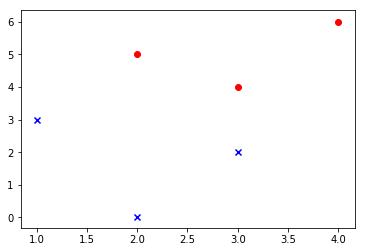

In [188]:
# comando para plotagem direta no Jupyter notebook
%matplotlib inline

# plotar os pontos da classe positiva em azul com marcadores em "x":
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", marker="x")

#plotar os pontos da classe negativa em vermelho com marcadores "o"
plt.scatter(X[y == -1, 0], X[y == -1, 1], color="red", marker="o")

# exibe o gráfico.
plt.show()

## Exercícios

**1)** Conforme apresentado acima, leia o arquivo "treino.csv" gerado na **parte 1** desse exercício. Plote os dados contidos no arquivo em um gráfico de dispersão, configure o conjunto de vetores de características em uma matriz "$X$" onde cada linha é o vetor de características, configure o conjunto de labels "$y$" tal que o conjunto de labels esteja relacionada com "$X$" por suas ordens, ou seja, a amostra na linha $i$ da matriz $X$ possui o rotulo $y$ na posição $i$.

Realiza a importação dos módulos necessários, plote os gráficos de dispersão com marcador "x" e cor azul para as amostras de classe positiva e marcador "o" e cor "vermelha" para as amostras de classe negativa. Visualmente diga se os dados são linearmente separáveis ou não.

In [189]:
df_train = pd.read_csv("dataset/treino.csv", sep=";")

In [190]:
X = df_train.loc[:, ["sepal width", "sepal length"]].values
y = df_train.loc[:, ["type"]].values
y[y==0] = -1
df_train.head(5)


,sepal width,sepal length,type
0,4.8,3.4,1
1,4.9,3.1,1
2,5.0,3.4,1
3,5.4,3.9,1
4,5.7,2.8,0


In [191]:
# prepare data frames
df_setosa = df_train[df_train.type == 1]
df_versicolor = df_train[df_train.type == 0]

for df in [df_versicolor, df_setosa]:
    df['type_name'] = np.where(df['type']==0, 'Iris Versicolor', 'Iris Setosa')
    
# creating trace1
trace1 =go.Scatter(
                    x = df_versicolor["sepal width"],
                    y = df_versicolor["sepal length"],
                    mode = "markers",
                    name = "Iris Versicolor",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)', size = 10, symbol='circle'),
                    text= df_versicolor["type_name"])
# creating trace2
trace2 =go.Scatter(
                    x = df_setosa["sepal width"],
                    y = df_setosa["sepal length"],
                    mode = "markers",
                    name = "Iris Setosa",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)', size = 10, symbol='x'),
                    text= df_setosa["type_name"])

data = [trace1, trace2]
layout = dict(title = 'Iris Classes',
              xaxis= dict(title= 'Sepal Width',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Sepal Length',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

**Observando visualmente os dados, percebe-se que os mesmos são linearmente separáveis.**

**2)** Dentro da pasta "ml" crie um modulo chamado "perceptron". Implemente uma classe chamada "PerceptronBatch" com pelo menos os métodos "fit" e "predict", onde "fit" recebe o conjunto de vetores com duas características e o conjunto
de rótulos (classes ou *labels*) com duas classes e treina o classificador Perceptron de Rosenblatt utilizando o algoritmo em Batch e ao final do método configure o atributo "w" e b contendo os pesos e bias do Perceptron respectivamente. O método "predict" recebe um conjunto de amostras (vetores com duas características) e utiliza o algoritmo de Perceptron para classificar a classe em -1 ou 1. Sua classe deve suportar configurar uma semente para número aleatórios ("random_state") e um valor para o coeficiente de aprendizagem (eta) no construtor de sua classe.

Após implementa-lo, crie uma instância da sua classe com random_state=0 e eta=0.001 treine o Perceptron com "X" e "y" lidos no exercício anterior e imprima os valores de pesos ("w") e bias ("b").

Obs.: Abaixo segue o pseudo-código do algoritmo de treinamento do Perceptron de Rosenblatt em Batch. adaptado de https://www.cis.upenn.edu/~cis519/fall2014/lectures/04_LinearClassificationPerceptron.pdf (slide 12):

1. Seja $S_n = \{ (\vec{x}^{(1)}, y^{(1)}), (\vec{x}^{(2)}, y^{(2)}), \dots (\vec{x}^{(n)}, y^{(n)}) \}$ o conjunto
   de exemplos de treinamento.

2. Inicialize $\vec{w}$ e $b$ com valores aleatorios próximos de zero

3. Seja $\Delta w = (0,0,0, \dots, 0) \in \mathbb{R}^d$ e $\Delta b$ os valores iniciais para atualizações de     
   pesos.

4. Para cada $(\vec{x}^{(i)}, y^{(i)}) \in S_n$ faça
    * $z^{(i)}$ $\leftarrow$ $\vec{w}^T \vec{x}^{(i)} + b$
    * $e^{(i)}$ $\leftarrow$ $y^{(i)} - \Phi(z^{(i)})$ 
    * $\Delta w$ $\leftarrow$ $\Delta w$ + $e^{(i)}\vec{x}^{(i)}$
    * $\Delta b$ $\leftarrow$ $\Delta b$ + $e^{(i)}$

5. $\Delta w$ $\leftarrow$ $\frac{\Delta w}{n}$ e $\Delta b$ $\leftarrow$ $\frac{\Delta b}{n}$

6. $w \leftarrow w + \eta \Delta w$ e $b \leftarrow \eta \Delta b$

7. Se errou (existe um $e^{(i)} \not= 0$) volte ao passo 3; senão seu Perceptron é definido por $w$ e $b$

In [192]:
from ml.perceptron import PerceptronBatch

In [193]:
pb = PerceptronBatch(random_state=0, eta=0.001)
pb.fit(X, y)
print("W: \t{}\nb: \t{}".format(pb.w, pb.b))

W: 	[[-0.2935865   0.32908937]]
b: 	[[0.47276338]]


### Plotagem de função em Python

Para o próximo exercício, você precisará plotar uma reta utilizando "matplotlib" (superfície de decisão do Perceptron). Para plotar uma reta em Python vamos utilizar a equação da reta:

$$ x_2 = ax_1 + b $$

Neste caso não importa os valores de a e b, para exemplificar, vamos fazer $a = 2$ e $b = 3$. Precisamos também definir o intervalo da plotagem, que nesse exemplo vamos definir como $\left[-3,3\right]$. Para implementar esse gráfico em Python, vamos utilizar a função "linspace" do NumPy. Essa função gera $N$ amostras espaçadas igualmente em um intervalo dado como parâmetro. Vamos também utilizar a função "plot" do "matplotlib" que dados um conjunto de coordenadas da abscissa e ordenada, desenha um segmento de reta que liga todos as coordenadas.

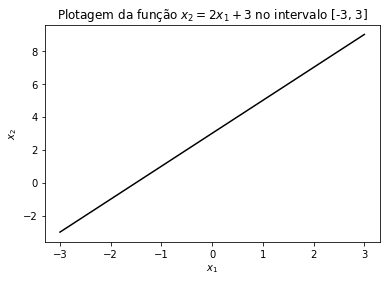

In [194]:
# configurando as constantes a e b
a = 2
b = 3

# Gerando 100 amostras do intervalo [-3, 3]
x1 = np.linspace(start=-3, stop=3, num=100) 

# calculado as ordenadas "y"
x2 = a*x1 + b

# plotando a "reta"
plt.plot(x1, x2, color="black")
plt.title("Plotagem da função $x_2 = 2x_1 + 3$ no intervalo [-3, 3]")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

**3)** Para visualizar a interpretação gráfica do Perceptron, plote o gráfico de dispersão do seu conjunto de dados de maneira semelhante ao exercício **1)** e no mesmo gráfico, plote a reta (ou superfície de decisão) do Perceptron treinado no exercício anterior.

DICA: Lembre-se que a reta (ou superfície de decisão) do Perceptron é definida como:

$$ \vec{w}^T \vec{x} + b = 0 $$

In [195]:
# prepare data frames
df_versicolor = X[(y==-1)[:, 0]]
df_setosa = X[(y==1)[:, 0]]

# Prepare the decision function boundary
# Reference: https://stats.stackexchange.com/questions/169343/how-to-plot-the-or-function-along-with-the-decision-boundary-of-a-perceptron
b, w1, w2 = pb.b[0,0], pb.w[0, 0], pb.w[0, 1]
f_x = -b / w1
f_y = -b / w2
d = f_y
c = -f_y / f_x
line_x_coords = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
line_y_coords = c * line_x_coords + d

# creating trace1
trace1 =go.Scatter(
                    x = df_versicolor[:, 0],
                    y = df_versicolor[:, 1],
                    mode = "markers",
                    name = "Iris Versicolor",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)', size = 10, symbol='circle'),
)
# creating trace2
trace2 =go.Scatter(
                    x = df_setosa[:, 0],
                    y = df_setosa[:, 1],
                    mode = "markers",
                    name = "Iris Setosa",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)', size = 10, symbol='x'),
)

trace3 = go.Scatter(
    x = line_x_coords,
    y = line_y_coords,
    mode = 'lines',
    name = 'Perceptron Decision Function'
)

data = [trace1, trace2, trace3]
layout = dict(title = 'Iris Classes',
              xaxis= dict(title= 'Sepal Width',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Sepal Length',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

**4)** Agora vamos verificar como o Perceptron se sai no conjunto de dados de teste. Primeiramente, leia sua base de testes (arquivo "teste.csv", gerado na parte 1 do exercício), então semelhantemente ao exercício anterior plote os dados de teste em um gráfico de dispersão com a reta do seu Perceptron.

**OBS.:** Não treine seu Perceptron com os dados de teste. Mantenha os pesos do Perceptron conforme encontrados no exercício de treinamento. Estamos verificando a eficiência do seu Perceptron treinado com os dados de treinamento.

In [196]:
df_test = pd.read_csv("dataset/teste.csv", sep=";")
X_test = df_test.loc[:, ["sepal width", "sepal length"]].values
y_test = df_test.loc[:, ["type"]].values
y_test[y_test==0] = -1
df_test.head(5)

,sepal width,sepal length,type
0,5.0,3.0,1
1,5.0,3.4,1
2,4.5,2.3,1
3,5.2,3.4,1
4,4.7,3.2,1


In [197]:
# prepare data frames
df_versicolor_test = X_test[(y_test==-1)[:, 0]]
df_setosa_test = X_test[(y_test==1)[:, 0]]

# Prepare the decision function boundary
# Reference: https://stats.stackexchange.com/questions/169343/how-to-plot-the-or-function-along-with-the-decision-boundary-of-a-perceptron
line_x_coords = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]))
line_y_coords = c * line_x_coords + d

# creating trace1
trace1 =go.Scatter(
                    x = df_versicolor_test[:, 0],
                    y = df_versicolor_test[:, 1],
                    mode = "markers",
                    name = "Iris Versicolor",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)', size = 10, symbol='circle'),
)
# creating trace2
trace2 =go.Scatter(
                    x = df_setosa_test[:, 0],
                    y = df_setosa_test[:, 1],
                    mode = "markers",
                    name = "Iris Setosa",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)', size = 10, symbol='x'),
)

trace3 = go.Scatter(
    x = line_x_coords,
    y = line_y_coords,
    mode = 'lines',
    name = 'Perceptron Decision Function'
)

data = [trace1, trace2, trace3]
layout = dict(title = 'Iris Classes',
              xaxis= dict(title= 'Sepal Width',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Sepal Length',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

**5)** Agora encontre a quantidade de amostras de teste mal-classificadas utilizando código Python. O número encontrado é mesmo visualizado na interpretação gráfica do exercício anterior?

**DICA.:** Utilize o método predict da sua classe de Perceptron.

In [198]:
error_test = y_test.T-pb.predict(X_test)
print("Amostras mal-classificadas: {}".format(len(error_test[error_test!=0])))

Amostras mal-classificadas: 2


**O número de amostra mal-classificadas corresponde a 2, tanto no gráfico, como na verificação do erro.**

### Comentários

Utilize a célula abaixo caso deseja comentar e passar o feedback sobre o exercício.


É solicitado a classificação em -1 e +1, mas o arquivo lido é com classe 0 e 1. Fica um pouco confuso.
Poderia ter alguns módulos de teste já implementados, para verificar se a implementação está correta.

A estrutura do notebook está muito boa, os exemplos ajudaram bastante

In [202]:
str("{}; {}; {}".format(4.5, 3.5, 1))

'4.5; 3.5; 1'